In [1]:
from transformers import BertModel, BertTokenizer
import torch

In [2]:
reviews = ['i love it', 'tastes good', 'nice meal']
reviews_cat = ''
for i in reviews:
    reviews_cat = reviews_cat + ' [SEP] ' + i
reviews_cat = reviews_cat[7:]

In [3]:
reviews_cat

'i love it [SEP] tastes good [SEP] nice meal'

In [4]:
model_name = 'bert-base-uncased'
# 读取模型对应的tokenizer
tokenizer = BertTokenizer.from_pretrained(model_name)
# 载入模型
model = BertModel.from_pretrained(model_name)


In [5]:
encode = tokenizer.encode_plus(reviews_cat, add_special_tokens=True, max_length=30, pad_to_max_length=True)

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [13]:
model(torch.tensor([encode['input_ids']]), attention_mask=torch.tensor([encode['attention_mask']]))[1].shape

torch.Size([1, 768])

In [6]:
encode

{'input_ids': [101, 1045, 2293, 2009, 102, 16958, 2204, 102, 3835, 7954, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [13]:
import matplotlib.pyplot as plt
import os
import json

In [7]:
text_path = os.path.join('data', 'train.json')
reviews = []
with open(text_path, 'r') as t:
    print("Reading raw texts")
    for line in t:
        raw_review = json.loads(line)
        raw_review = raw_review['Text']
        raw_review = raw_review.split('|||')
        review_cat = ''
        for i in raw_review:
            # review_cat = review_cat + ' [SEP] ' + i
            review_cat = review_cat  + i
        # review_cat = review_cat[7:]
        reviews.append(review_cat)

Reading raw texts


In [20]:
lens = []
for t in reviews:
    lens.append(len(t.split()))

(array([11877., 10756.,  6149.,  3153.,  1646.,   776.,   456.,   285.,
          215.,   122.]),
 array([  10.,  116.,  222.,  328.,  434.,  540.,  646.,  752.,  858.,
         964., 1070.]),
 <BarContainer object of 10 artists>)

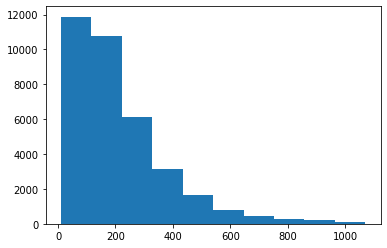

In [17]:
plt.hist(lens)

In [19]:
text_path = os.path.join('data', 'valid.json')
reviews = []
with open(text_path, 'r') as t:
    print("Reading raw texts")
    for line in t:
        raw_review = json.loads(line)
        raw_review = raw_review['Text']
        raw_review = raw_review.split('|||')
        review_cat = ''
        for i in raw_review:
            # review_cat = review_cat + ' [SEP] ' + i
            review_cat = review_cat  + i
        # review_cat = review_cat[7:]
        reviews.append(review_cat)

Reading raw texts


(array([751., 695., 379., 179., 114.,  48.,  19.,  16.,  10.,   4.]),
 array([  12. ,  120.2,  228.4,  336.6,  444.8,  553. ,  661.2,  769.4,
         877.6,  985.8, 1094. ]),
 <BarContainer object of 10 artists>)

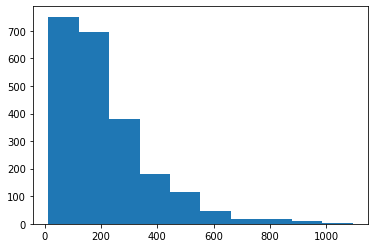

In [21]:
plt.hist(lens)

In [4]:
import gradio as gr

def greet(name):
  return "Hello " + name + "!"

iface = gr.Interface(fn=greet, inputs="text", outputs="text")
iface.launch(share=True)

Running locally at: http://127.0.0.1:7863/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Interface loading below...


MissingSchema: Invalid URL 'None': No schema supplied. Perhaps you meant http://None?

In [8]:
import numpy as np
import argparse
import torch
import os, pickle, json
from model_pytorch import BertVistaNet
from train_transformer import test_evaluate

parser = argparse.ArgumentParser()
parser.add_argument('--dropout_keep_prob', type=float, default=0.5)
parser.add_argument('--num_images', type=int, default=3)
parser.add_argument('--num_classes', type=int, default=5)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

args = parser.parse_args()
model = BertVistaNet(args.num_images, args.num_classes, args.dropout_keep_prob).to(device)
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict']) 
epoch = checkpoint['epoch']

# model.eval()
test_evaluate(criterion, model, cities, args, epoch, result_file, vision_model, test_loader)

usage: ipykernel_launcher.py [-h] [--dropout_keep_prob DROPOUT_KEEP_PROB]
                             [--num_images NUM_IMAGES]
                             [--num_classes NUM_CLASSES]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/bit1008/.local/share/jupyter/runtime/kernel-640c9214-8960-4d88-8343-a1b1906f863c.json


SystemExit: 2

/home/bit1008/anaconda3/envs/vista-torch/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
